In [1]:
# EDA
# veri analizi ve incelemeler için kütüphanelerin yüklenmesi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# dosya .xlsx formatında .csv formatına çevrilip öyle okunacak.
df = pd.read_excel("/content/side_effect_data 1.xlsx")
df.to_csv("side_effect_data.csv", index=False)
df = pd.read_csv("side_effect_data.csv")

In [4]:
# evet çevrilen dosya hakkında birkaç bilgi
print(df.info())
# verinin temel istatistiklerini görüntüle
print(df.describe(include='all'))
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Kullanici_id                      2357 non-null   int64  
 1   Cinsiyet                          1579 non-null   object 
 2   Dogum_Tarihi                      2357 non-null   object 
 3   Uyruk                             2357 non-null   object 
 4   Il                                2130 non-null   object 
 5   Ilac_Adi                          2357 non-null   object 
 6   Ilac_Baslangic_Tarihi             2357 non-null   object 
 7   Ilac_Bitis_Tarihi                 2357 non-null   object 
 8   Yan_Etki                          2357 non-null   object 
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   object 
 10  Alerjilerim                       1873 non-null   object 
 11  Kronik Hastaliklarim              1965 non-null   object 
 12  Baba K

In [5]:
# eksik verileri kontrol etmek için..
print(df.isnull().sum())
print("--------------------------------------------")
# kategorik değişkenlerin değerleri bunlar da.
print(df['Cinsiyet'].value_counts()) # cinsiyet
print(df['Yan_Etki'].value_counts()) # yan etkiler


Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64
--------------------------------------------
Cinsiyet
Female    872
Male      707
Name: count, dtype: int64
Yan_Etki
Agizda Farkli Bir Tat    229
Tansiyon Yukselme        227
Yorgunluk                204
Gormede Bulaniklik     

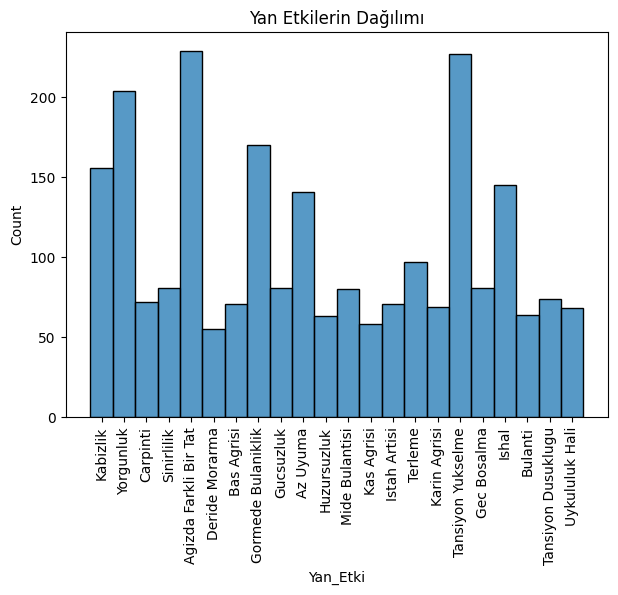

In [6]:
# yan etkilerin dağılımı histogramı
plt.figure(figsize=(7, 5))
sns.histplot(df['Yan_Etki'])
plt.xticks(rotation=90)
plt.title('Yan Etkilerin Dağılımı')
plt.show()

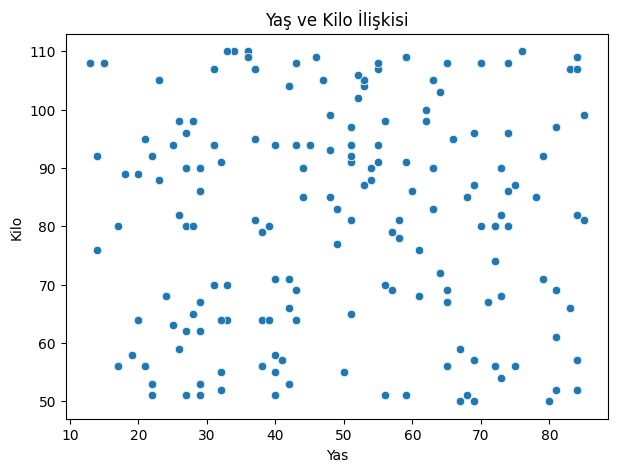

In [7]:
# Yaş ve Kilo ilişkisini scatter plot ile göster
df['Dogum_Tarihi'] = pd.to_datetime(df['Dogum_Tarihi'])
df['Yas'] = pd.Timestamp.now().year - df['Dogum_Tarihi'].dt.year

plt.figure(figsize=(7,5))
sns.scatterplot(x='Yas', y='Kilo', data=df)
plt.title('Yaş ve Kilo İlişkisi')
plt.show()

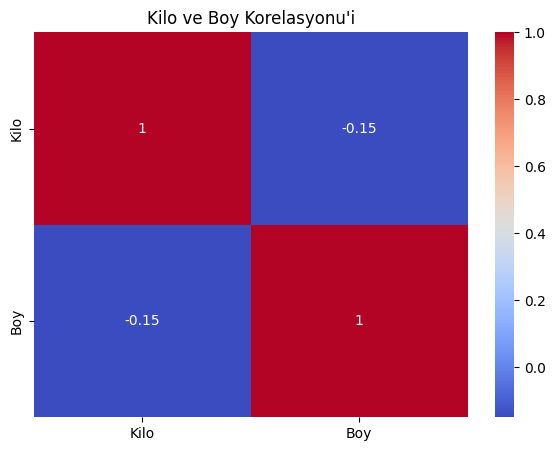

In [8]:
# korelasyon heatmap'i oluştur ( ısı haritası )
plt.figure(figsize=(7, 5))
sns.heatmap(df[['Kilo', 'Boy']].corr(), annot=True, cmap='coolwarm')
plt.title('Kilo ve Boy Korelasyonu\'i')
plt.show()

In [9]:
# data pre-processing işlemleri
# import
from sklearn.impute import SimpleImputer

# kategorik eksik verileri doldurmak için
kategorilerim = ['Cinsiyet', 'Il', 'Alerjilerim', 'Kronik Hastaliklarim',
                        'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
                        'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
                        'Kan Grubu']

# en sık tekrar eden değerle doldurulması..
imputer_cat = SimpleImputer(strategy='most_frequent')
df[kategorilerim] = imputer_cat.fit_transform(df[kategorilerim])


In [10]:
# sayısal eksik verilerin doldurulması
sayısallar = ['Kilo', 'Boy']

# ortalamalarla doldurulur.
imputer_num = SimpleImputer(strategy='mean')
df[sayısallar] = imputer_num.fit_transform(df[sayısallar])


In [11]:
# eksik verileri tekrar kontrol etmek için..
print(df.isnull().sum()) # tamamen sıfırlanmıştır.

Kullanici_id                        0
Cinsiyet                            0
Dogum_Tarihi                        0
Uyruk                               0
Il                                  0
Ilac_Adi                            0
Ilac_Baslangic_Tarihi               0
Ilac_Bitis_Tarihi                   0
Yan_Etki                            0
Yan_Etki_Bildirim_Tarihi            0
Alerjilerim                         0
Kronik Hastaliklarim                0
Baba Kronik Hastaliklari            0
Anne Kronik Hastaliklari            0
Kiz Kardes Kronik Hastaliklari      0
Erkek Kardes Kronik Hastaliklari    0
Kan Grubu                           0
Kilo                                0
Boy                                 0
Yas                                 0
dtype: int64


In [12]:
# genel bilgi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          2357 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2357 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   object        
 7   Ilac_Bitis_Tarihi                 2357 non-null   object        
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   object        
 10  Alerjilerim                       2357 non-null 

In [13]:
#istatistiksel bilgi
print(df.describe(include='all'))

        Kullanici_id Cinsiyet                   Dogum_Tarihi    Uyruk     Il  \
count    2357.000000     2357                           2357     2357   2357   
unique           NaN        2                            NaN        1     13   
top              NaN   Female                            NaN  Turkiye  Adana   
freq             NaN     1650                            NaN     2357    447   
mean       97.216801      NaN  1974-11-25 04:06:12.677131936      NaN    NaN   
min         1.000000      NaN            1939-10-12 00:00:00      NaN    NaN   
25%        47.000000      NaN            1959-02-05 00:00:00      NaN    NaN   
50%        97.000000      NaN            1973-09-09 00:00:00      NaN    NaN   
75%       146.000000      NaN            1992-03-24 00:00:00      NaN    NaN   
max       196.000000      NaN            2011-04-25 00:00:00      NaN    NaN   
std        57.017200      NaN                            NaN      NaN    NaN   

                              Ilac_Adi 